# Student success Predictor (Pass/Fail) using some components (study_hours , internet_use) etc etc 

# Data insertion

In [3]:
import pandas as pd
df = pd.read_csv('student_performance (1).csv')
df


,StudyHours,Attendance,PastScore,Internet,SleepHours,Passed
0,2,60,40,Yes,5,No
1,5,80,60,No,6,Yes
2,8,90,75,Yes,8,Yes
3,3,70,50,Yes,5,No
4,7,85,70,No,7,Yes
5,1,50,30,No,4,No
6,6,78,68,Yes,6,Yes
7,4,65,55,No,5,No
8,9,95,80,Yes,9,Yes
9,2,55,35,No,4,No


# Data Preprocessing

In [58]:
display(df.info())
display(df.isnull().sum())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   StudyHours  20 non-null     int64
 1   Attendance  20 non-null     int64
 2   PastScore   20 non-null     int64
 3   Internet    20 non-null     int64
 4   SleepHours  20 non-null     int64
 5   Passed      20 non-null     int64
dtypes: int64(6)
memory usage: 1.1 KB


None

StudyHours    0
Attendance    0
PastScore     0
Internet      0
SleepHours    0
Passed        0
dtype: int64

,StudyHours,Attendance,PastScore,Internet,SleepHours,Passed
count,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000
mean,5.100000,74.250000,59.10000,0.550000,6.050000,0.550000
std,2.845125,17.329242,19.41215,0.510418,2.038446,0.510418
min,1.000000,40.000000,25.00000,0.000000,3.000000,0.000000
25%,2.750000,60.000000,43.75000,0.000000,4.750000,0.000000
50%,5.000000,77.000000,62.50000,1.000000,6.000000,1.000000
75%,7.250000,88.500000,72.75000,1.000000,7.250000,1.000000
max,10.000000,99.000000,90.00000,1.000000,10.000000,1.000000


In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Internet'] = le.fit_transform(df['Internet'])
df['Passed'] = le.fit_transform(df['Passed'])
df

,StudyHours,Attendance,PastScore,Internet,SleepHours,Passed
0,2,60,40,1,5,0
1,5,80,60,0,6,1
2,8,90,75,1,8,1
3,3,70,50,1,5,0
4,7,85,70,0,7,1
5,1,50,30,0,4,0
6,6,78,68,1,6,1
7,4,65,55,0,5,0
8,9,95,80,1,9,1
9,2,55,35,0,4,0


# Model Selection and import necessary libs

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix , accuracy_score , f1_score , recall_score
from sklearn.metrics import precision_score , mean_absolute_error , mean_squared_error

# Model build and Prediction (Classification - LogisticRegression(Supervised))

In [ ]:
pipe = Pipeline([
    ('model' , LogisticRegression())
])

X = df[['StudyHours','Attendance' , 'Internet' ,'PastScore' ,'SleepHours']]
y = df['Passed']
X_train , X_test , y_train , y_test = train_test_split(X , y ,test_size = 0.3 , random_state = 42 , stratify = y)
pipe.fit(X_train , y_train)
y_pred = pipe.predict(X_test)

# Model Evaluation

In [34]:
test = confusion_matrix(y_test , y_pred)
test

array([[3, 0],
       [0, 3]])

In [36]:
test = mean_squared_error(y_test , y_pred)
test


0.0

In [37]:
test = mean_absolute_error(y_test , y_pred)
test


0.0

In [39]:

test = precision_score(y_test , y_pred)
test


1.0

In [40]:
test = accuracy_score(y_test , y_pred)
test

1.0

In [41]:
test = f1_score(y_test , y_pred)
test

1.0

In [42]:
test = recall_score(y_test , y_pred)
test

1.0

In [43]:
import numpy as np
test = np.sqrt(test)
test

np.float64(1.0)

In [44]:
df

,StudyHours,Attendance,PastScore,Internet,SleepHours,Passed
0,2,60,40,1,5,0
1,5,80,60,0,6,1
2,8,90,75,1,8,1
3,3,70,50,1,5,0
4,7,85,70,0,7,1
5,1,50,30,0,4,0
6,6,78,68,1,6,1
7,4,65,55,0,5,0
8,9,95,80,1,9,1
9,2,55,35,0,4,0


# Model Visualization

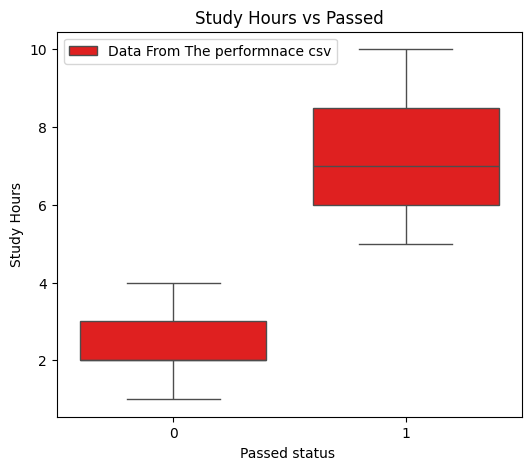

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
sns.boxplot(x='Passed', y='StudyHours', data= df , color = 'r' , label = "Data From The performnace csv")
plt.xlabel("Passed status ")
plt.ylabel("Study Hours")
plt.title("Study Hours vs Passed")
plt.show()


In [55]:
help(sns.boxplot)

Help on function boxplot in module seaborn.categorical:

boxplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    order=None,
    hue_order=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.75,
    fill=True,
    dodge='auto',
    width=0.8,
    gap=0,
    whis=1.5,
    linecolor='auto',
    linewidth=None,
    fliersize=None,
    hue_norm=None,
    native_scale=False,
    log_scale=None,
    formatter=None,
    legend='auto',
    ax=None,
    **kwargs
)
    Draw a box plot to show distributions with respect to categories.

    A box plot (or box-and-whisker plot) shows the distribution of quantitative
    data in a way that facilitates comparisons between variables or across
    levels of a categorical variable. The box shows the quartiles of the
    dataset while the whiskers extend to show the rest of the distribution,
    except for points that are determined to be "outliers" using a method
    that is a function of the inter-quartile range.
